**<font color = black size=6>实验七:聚类</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
import random
from collections import Counter
warnings.filterwarnings('ignore')
from pandas.core.frame import DataFrame
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

**<font color = blue size=4>第一部分:实验任务</font>**

本任务使用train.csv数据集，共有二维特征【weight】,【height】.本次实验检测使用二类聚类算法: 原型聚类法【K-means】和密度聚类法【DBSCAN】.

1)对该数据集进行聚类处理

2)聚类完成后进行可视化处理

由于层次聚类法计算量大，复杂度高，本次实验任务不做要求，感兴趣的同学可以自行实现。

<span style="color:purple">1.首先编写计算衡量样本间的相似度的距离，这里列举两种距离公式.之后的任务中从两个距离公式中选择一种使用，但需要保证两个任务要使用同样的距离公式</span>
    
<span style="color:purple">a.曼哈顿距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的曼哈顿距离计算公式为:  
    $$dist_{man}(x_i,x_j)=\sum_{u=1}^d |x_{iu}-x_{ju}|$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

<span style="color:purple">b.欧式距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的欧式距离计算公式为:  
    $$dist_{ed}(x_i,x_j)=\sqrt{\sum_{u=1}^d (x_{iu}-x_{ju})^2}$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

In [2]:
#曼哈顿距离
def manhattan_distance(x, y):
    distance = 0
    for i in range(len(x)):
        distance += abs(x[i] - y[i])
    return distance

#欧式距离
def euclidean_distance(x,y):
    distance = 0
    for i in range(len(x)):
        distance += (x[i] - y[i])**2
        distance = distance**0.5
    return distance

**<font color = green size=3>1):常用聚类算法一: 原型聚类法</font>**

使用K-means算法对数据集进行聚类处理，具体逻辑参照下面图片所给的伪代码

In [3]:
%%html
<img src="K_means Pseudocode.png", width=720, heigth=240>

<span style="color:purple">1) 确定聚类数量$k$，然后从数据集D中随机选取$k$个样本作为初始均值向量$\{\mu_1,\mu_2,...,\mu_{k}\}$</span>


In [4]:
#加载数据集
df = pd.read_csv('./train.csv')
print('dataset:\n',df[:5])

#聚类数量
k = 3

#初始化每个聚类的簇心向量
cluster_centroids = []

#随机选取k个样本作为初始均值向量
cluster_centroids = df.sample(k).values.tolist()

#初始化各个聚类集合
clusters_set = [set() for _ in range(k)]

print(cluster_centroids)


dataset:
       Weight      Height
0  67.062924  176.086355
1  68.804094  178.388669
2  60.930863  170.284496
3  59.733843  168.691992
4  65.431230  173.763679
[[66.71668643853911, 171.56539830333062], [69.3097038725317, 177.72608496073366], [63.090109974718246, 169.50335646192002]]


<span style="color:purple">2)开始进行迭代。每一轮更新均值向量，直到均值向量不再变化则停止迭代</span>

<span style="color:purple">迭代步骤1).遍历每个样本$x_j$,计算其与当前的各个均值向量$\mu_i$的距离$d_{ji}$，比较与每个均值向量的距离大小:
   $$\lambda_j=arg min_{i \in \{1,2,...,k\}}d_{ji}$$
   将其划入与其距离最近的簇中,
   $$C_{\lambda_j}=C_{\lambda_j}\bigcup{x_j}$$</span>
   
<span style="color:purple">迭代步骤2).将所有样本划分完成生成k个簇$\{C_1,C_2,...,C_k\}$。对于每个簇$C_i$，计算该簇的新均值向量，公式为:
$$\mu_i^{'}=\frac{1}{|C_i|}\sum_{x \in C_i}x$$</span>

<span style="color:purple">迭代步骤3).将更新的均值向量$\{\mu_1^{'},\mu_2^{'},...,\mu_k^{'}\}$与该轮未更新前的均值向量$\{\mu_1,\mu_2,...,\mu_k\}$进行比较.  如果完全一样，则结束迭代；如果不一样，则继续迭代.</span>

In [5]:
#比较均值向量是否相同
def equallist(x, y):
    # print('x',x,'\ny',y)
    return np.array_equal(x, y)

old_cluster_centroids = [[np.Infinity,np.Infinity] for centroid in cluster_centroids] 

#迭代过程
#until mean vector not update
while(not equallist(old_cluster_centroids, cluster_centroids)):
    print('iter')
    old_cluster_centroids = np.copy(cluster_centroids)
    
    
    clusters_set = [set() for _ in range(k)]
        
    #计算每个样本与k个聚类的簇心的距离，将其划入距离最近的簇
    for idx, row in df.iterrows():
        # print(row.to_list())
        distances = np.array([euclidean_distance(row,centroid) for centroid in cluster_centroids],dtype=float)
        # print(distances)
        cluster_assignment = np.argmin(distances)
        clusters_set[cluster_assignment].add(idx)
        
    #更新这轮迭代的簇心
    for i in range(k):
        cluster_samples = df.loc[clusters_set[i]].values
        # 簇存在元素
        if len(cluster_samples):
            cluster_centroids[i] = np.mean(cluster_samples, axis=0).tolist()
    
    # print('cluster_centroids',cluster_centroids)
    # print('old_cluster_centroids',old_cluster_centroids)
            
#输出划分的聚类情况 
print('聚类簇心坐标：\n',np.round(cluster_centroids, 2))
for i in range(k):
    print('簇' + str(i + 1) + '中的样本个数：', len(clusters_set[i]))


iter
iter
iter
iter
iter
iter
聚类簇心坐标：
 [[ 61.97 169.64]
 [ 67.5  175.96]
 [ 53.6  162.76]]
簇1中的样本个数： 249
簇2中的样本个数： 126
簇3中的样本个数： 125


<span style="color:purple">3)判断是否有空簇,返回所有非空的簇,空簇丢弃</span>

In [6]:
# 判断是否有空簇,返回所有非空的簇,空簇丢弃
empty = []
for i in range(k):
    if len(clusters_set[i])==0:
        empty.append(i)
        
print(empty)


[]


<span style="color:purple">4)将数据集的二维特征值作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

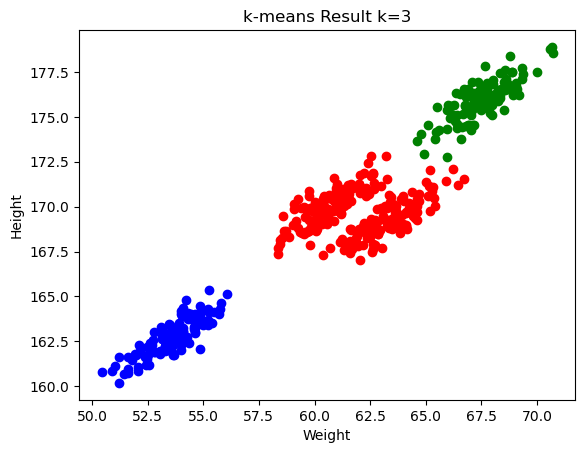

In [7]:

# 创建一个新的figure
plt.figure()

# 定义一个颜色列表，可以根据需要自定义
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# 根据聚类标签绘制样本点
for i in range(k):
    
    # 空簇丢弃
    if i in empty:
        continue
    
    samples_index = list(clusters_set[i])
    # print(samples_index)
    samples = df.iloc[samples_index]
    
    x = samples['Weight'].tolist()
    y = samples['Height'].tolist()
    # 绘制样本点
    plt.scatter(x, y, c=colors[i % len(colors)])

# 设置图形标题和轴标签
plt.title(f'k-means Result k={k}')
plt.xlabel('Weight')
plt.ylabel('Height')

# 显示图形
plt.show()

**<font color = green size=3>2):常用聚类算法二: 密度聚类法</font>**

本任务依然使用train.csv数据集，使用DBSCAN算法对数据集进行聚类处理，具体逻辑参照"图片2:DBSCAN伪代码"中的伪代码

<span style="color:purple">1)首先编写函数,根据“邻域”参数（epsilon,MinPts），输出该样本的领域对象的样本索引列表.    
    【输入】：输入数据集D、当前样本的索引index、 邻域半径epsilon   
    【输出】：该样本的邻域对象的样本索引列表</span>

In [8]:
def get_neighbors(D, index, epsilon):
    
    # 初始样本
    neighbors = []

    # 遍历所有样本
    for i in range(len(D)):
        # 如果样本与当前样本的距离小于等于邻域半径，则将其加入邻域内
        
        # Euclidean 范数
        # print(D.iloc[i])
        # print(D.iloc[index])
        diff = D.iloc[i].to_numpy() - D.iloc[index].to_numpy()
        # print('diff',diff)
        if np.linalg.norm(diff) <= epsilon:
            neighbors.append(i)
            
    return neighbors

<span style="color:purple">2)编写函数,根据“邻域”参数（epsilon,MinPts），输出数据集D的所有的核心对象.    
    【输入】：输入数据集D、当前样本的索引index、邻域参数（epsilon,MinPts）   
    【输出】：该数据集D的所有的核心对象</span>

In [9]:
def core_set(D:pd.DataFrame,epsilon,MinPts):
    # 初始化核心对象集合
    core_objects = []

    # 对每个样本进行遍历
    for i in range(len(D)):
        # 获取邻域内的所有样本的索引
        neighbors = get_neighbors(D, i, epsilon)
        
        # 如果邻域内的样本数量大于等于最小样本数，则将当前样本标记为核心对象
        if len(neighbors) >= MinPts:
            core_objects.append(i)
            
    return core_objects

# core_set(df,10,20)

<span style="color:purple">3)遍历核心对象集合中的所有元素，直至所有核心对象被访问,具体逻辑参照下面图片的伪代码</span>

In [10]:
%%html
<img src="DBSCAN Pseudocode.png", width=720, heigth=240>

In [17]:

# 初始化参数epsilon,MinPts
D = df
epsilon = 0.9
MinPts = 50

# 初始化标签数组，0表示未分类
labels = [0] * len(D)
# print(labels)

# 生成核心对象集合
core_objects = core_set(D, epsilon, MinPts)
print(core_objects)

# 定义当前簇的标签
cluster_label = 0

# 对核心对象集合进行遍历
for core_object in core_objects:
    # 如果核心对象已经分类，则跳过
    if labels[core_object] != 0:
        continue

    # 创建一个新的簇，将核心对象标记为该簇
    cluster_label += 1
    labels[core_object] = cluster_label

    # 获取由核心对象密度直达的样本集合Δ
    delta = get_neighbors(D, core_object, epsilon)

    # 遍历样本集合Δ
    while len(delta) > 0:
        # 取出一个样本
        sample = delta.pop(0)

        # 如果样本已经分类，则跳过
        if labels[sample] != 0:
            continue

        # 将样本标记为当前簇
        labels[sample] = cluster_label

        # 获取由样本密度直达的样本集合Δ'
        delta_prime = get_neighbors(D, sample, epsilon)

        # 如果样本是核心对象，则将Δ'中的样本加入Δ
        if len(delta_prime) >= MinPts:
            delta.extend(delta_prime)
        

[0, 9, 13, 17, 18, 19, 24, 50, 51, 59, 60, 62, 80, 89, 92, 93, 104, 110, 112, 114, 119, 121, 123, 126, 127, 141, 145, 149, 157, 168, 179, 187, 198, 219, 256, 271, 282, 284, 298, 305, 316, 319, 326, 335, 340, 353, 369, 389, 398, 408, 431, 448, 449, 456, 467, 469, 473, 483, 487]


<span style="color:purple">4)将数据集的二维特征值作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

Counter({0: 272, 2: 82, 1: 74, 3: 72})
1
[0, 11, 16, 21, 39, 45, 48, 49, 59, 60, 62, 63, 64, 67, 73, 92, 96, 98, 107, 114, 116, 119, 123, 125, 126, 127, 128, 141, 143, 151, 157, 160, 172, 181, 187, 190, 211, 221, 239, 247, 252, 262, 264, 272, 274, 279, 282, 284, 287, 291, 294, 305, 312, 329, 332, 333, 335, 342, 346, 347, 351, 353, 363, 395, 397, 400, 422, 431, 436, 441, 449, 467, 469, 488]
0
[1, 3, 4, 5, 6, 8, 10, 12, 15, 20, 22, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 37, 40, 41, 42, 43, 44, 46, 52, 53, 54, 55, 56, 58, 65, 66, 69, 70, 71, 72, 74, 75, 76, 77, 83, 85, 88, 91, 94, 97, 100, 102, 105, 106, 111, 117, 118, 120, 122, 129, 132, 134, 137, 139, 140, 142, 144, 146, 148, 150, 154, 155, 156, 158, 159, 162, 163, 164, 165, 166, 169, 170, 173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 186, 188, 189, 191, 192, 193, 194, 195, 196, 197, 199, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 220, 222, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 237, 240, 

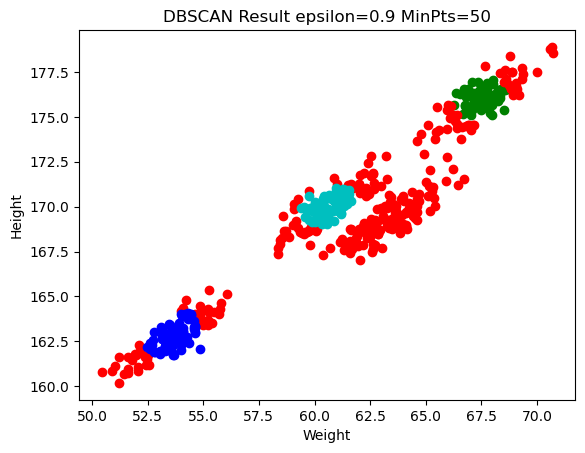

In [18]:
# show fig

# 创建一个新的figure
plt.figure()

# 定义一个颜色列表，可以根据需要自定义
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

c = Counter(labels)
print(c)

for key in c.keys():
    print(key)
    index = [ i for i,value in enumerate(labels) if value == key]
    print(index)
    x = df.iloc[index,0]
    y = df.iloc[index,1]
    
    # 绘制样本点
    plt.scatter(x, y, c=colors[key % len(colors)])

# 设置图形标题和轴标签
plt.title(f'DBSCAN Result epsilon={epsilon} MinPts={MinPts}')
plt.xlabel('Weight')
plt.ylabel('Height')

# 显示图形
plt.show()



**<font color = blue size=4>第二部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验报告下周（11.3 14:20）交  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验七(聚类)的实验报告:  
截止时间：2023-11-3 14:20  
提交地址：https://send2me.cn/iELj8D1c/SQ2D4iOn-q0vHQ

三、课堂课件获取地址:https://www.jianguoyun.com/p/DU6WTlcQp5WhChiKxZkFIAA  
实验内容获取地址:https://www.jianguoyun.com/p/DTeJc2sQp5WhChiv96IFIAA